<a href="https://colab.research.google.com/github/christakahashi/ECE447/blob/master/lectures/steady-state-error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECE 447: Steady State Error
===

Updated by 
 Dr. Chris Takahashi

Authored by Prof. Eric Klavins &copy; 2019, University of Washington


# Code

In [0]:
import numpy as np
import scipy.integrate as spi
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

#comment out for light mode
plt.style.use('dark_background')

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

# Steady State Error

The **steady state** error in a system is the difference between the input signal and the output signal after the system has come to equilibrium.

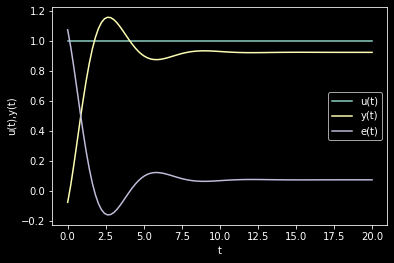

In [25]:
t = np.linspace(0,20,100)
u = 1+0*t
y = 0.925-np.exp(-0.5*t)*np.cos(t)
e = u-y
plt.plot(t,u,label="u(t)");
plt.plot(t,y,label="y(t)");
plt.plot(t,e,label="e(t)")
plt.xlabel("t")
plt.ylabel("u(t),y(t)")
plt.legend();

In the frequency domain, the error is defined by 

$$
E(s) = R(s) - Y(s)
$$

Using the final value theorem, we get the following expression for the steady state error

$$
e(\infty) = \lim_{s \rightarrow 0} s(R(s)-Y(s))
$$



Example: Open Loop
---

Consider the open loop system 

<img width=30.5% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sse-open-loop2.png">

with a step input $r(t) = 1$, $R(s) = 1/s$. Then the output is $\frac{1}{s}G(s)$ and

$$
e(\infty) = \lim_{s \rightarrow 0} s \left(\frac{1}{s}-\frac{1}{s}G(s)\right) = 1 - G(0)
$$

The quantity $G(0)$ is called the **DC Gain**. For example, if 

$$
G(s) = \frac{1}{s+a}
$$

then

$$
e(\infty) = 1 - G(0) = 1-\frac{1}{a}.
$$


Example: Closed Loop
---

Consider the closed loop system 

<img width=50.5% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sse-closed-loop.png">

with a step input $r(t) = 1$, $R(s) = 1/s$.

In this case, 

$$
Y(s) = R(s) \frac{KG(s)}{1+KG(s)}
$$

and

\begin{align}
E(s) & = R(s) - Y(s) \\
     & = \frac{1}{s} - \frac{1}{s}\frac{KG(s)}{1+KG(s)} \\
     & = \frac{1}{s} \frac{1}{1+KG(s)}
\end{align}

Using the final value theorem, we get 

$$
e(\infty) = \lim_{s \rightarrow 0} s E(s) = \frac{1}{1+KG(0)}
$$

which can be made small by choose $K$ to be large.

For example, if $G(s) = \frac{1}{s+a}$ then 

$$
e(\infty) = \frac{1}{1+\frac{1}{a}K} = \frac{a}{a+K}
$$

which goes to 0 as $K$ gets big.

Example: The Wonders of PI Control
---

Consider the PI control system 

<img width=60.5% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/sse-pi.png">

with a step input $r(t) = 1$, $R(s) = 1/s$.

In this case, the transfer function is

\begin{align}
T(s) & = \frac{\left(K_p+\frac{K_I}{s}\right)G(s)}
            {1+\left(K_p+\frac{K_I}{s}\right)G(s)} \\
     & = \frac{(K_p s + K_I)G(s)}{s+(K_p s + K_I)G(s)}
\end{align}

Then

$$
e(\infty) = \lim_{s \rightarrow 0} s(\frac{1}{s} - \frac{1}{s}T(s))
$$

Substituting in $T(s)$ with the above and taking the limit we get

$$
\lim_{s \rightarrow 0}\left(1 - T(s)\right) = 1 - \frac{K_IG(0)}{K_IG(0)} = 0.
$$

Cool!

# Using Sympy to Examine Steady State Error

In [18]:
# Plot the response of all three systems to compare

# First set up variables
var("a K Kp Ki", real=True)
var("t", real=True,positive=True)
var("s")

# Next define G(s) amd R(s)
G = 1/(s+a)
R = 1/s

# Open Loop
Tol = G
Yol = R*Tol

# Closed Loop
Tcl = K*G/(1+K*G)
Ycl = R*Tcl

# PI Control
Gc = Kp + Ki/s
Tpi = Gc*G / ( 1 + Gc * G)
Ypi = R*Tpi

# Show Transfer Functions
Tol,Tcl,Tpi

⎛                                   Ki            ⎞
⎜                                   ── + Kp       ⎟
⎜  1             K                  s             ⎟
⎜─────, ───────────────────, ─────────────────────⎟
⎜a + s          ⎛  K      ⎞  ⎛    Ki     ⎞        ⎟
⎜       (a + s)⋅⎜───── + 1⎟  ⎜    ── + Kp⎟        ⎟
⎜               ⎝a + s    ⎠  ⎜    s      ⎟        ⎟
⎜                            ⎜1 + ───────⎟⋅(a + s)⎟
⎝                            ⎝     a + s ⎠        ⎠

In [19]:
# Compute Steady State Errors

limit(s*(R-Yol),s,0), limit(s*(R-Ycl),s,0), limit(s*(R-Ypi),s,0)

⎛a - 1    a     ⎞
⎜─────, ─────, 0⎟
⎝  a    K + a   ⎠

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


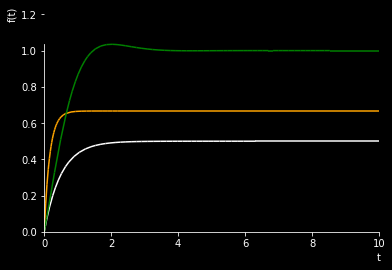

In [20]:
# Plot

# Define parameters
params = [(a,2), (K,4), (Kp,1), (Ki,4)]

# Find solutions in time domain for each y
yol = inverse_laplace_transform(Yol.subs(params), s, t)
ycl = inverse_laplace_transform(Ycl.subs(params), s, t)
ypi = inverse_laplace_transform(Ypi.subs(params), s, t)

# Plot
plots = plotting.plot(yol,ycl,ypi,(t,0,10), ylim=(0,1.2), show=false);
plots[1].line_color = 'orange'
plots[2].line_color = 'green'
plots.show()

# Steady State Error in State Space

If we have

\begin{align}
\dot x & = A x + B u \\
y & = C x
\end{align}

then denoting by $x^*$ the steady state of the system, we get

$$
\dot x = 0 = A x^* + B u
$$

so, assuming $A$ is invertible, we get

$$
x^* = - A^{-1}Bu
$$

Then

\begin{align}
e(\infty) & = u(\infty) - y(\infty) \\
     & =  ( 1 + C A^{-1} B ) u(\infty) 
\end{align}

Example
---

Say that 

\begin{align}
\dot x & = \begin{pmatrix}
0 & 1 \\
-2-K & -3
\end{pmatrix} x + \begin{pmatrix}
0 \\
1
\end{pmatrix} u \\
y & = \begin{pmatrix}
K & 0
\end{pmatrix} x
\end{align}

and suppose $u(t) = 1$.

Then 

\begin{align}
e(\infty) & = 1 + C A^{-1} B \\
          & = 1 + \begin{pmatrix}
K & 0
\end{pmatrix} \frac{1}{2+K} \begin{pmatrix}
-3 & -1 \\
2+K & 0
\end{pmatrix} \begin{pmatrix}
0 \\
1
\end{pmatrix} \\
  & = \frac{2}{2+K}
\end{align}


In [21]:
# Using sympy we can do the same thing

var("K t tau")
A = Matrix([
    [0,1],
    [-2-K,-3]
])
B = Matrix([[0],[1]])
C = Matrix([[K,0]])

ess = 1 + (C*A.inv()*B)[0]
ess.cancel()

  2  
─────
K + 2

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


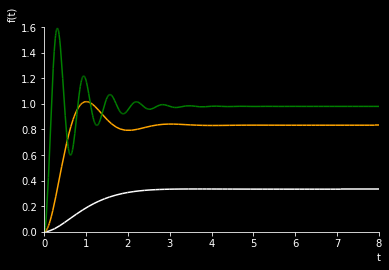

(0.667, 0.167, 0.0196)

In [22]:
# And we can plot the result as well

# Make an initial condition
x0 = Matrix([[0],[0]])

# Compute the natural and forced responses
nat = exp(A*t)*x0
forced = integrate(exp(A*(t-tau))*B,(tau,0,t))

# Get the output. Note, the nat and forced are 1x1 matrices, so we use [0,0] to get a scalar
y = (C*(nat+forced))[0,0]

# Plot some examples
plots = plotting.plot(y.subs(K,1), y.subs(K,10), y.subs(K,100),(t,0,8),ylim=(0,1.7),show=false);
plots[1].line_color = 'orange'
plots[2].line_color = 'green'
plots.show()

# Print out the steady state errors for the above plotted gains
N(ess.subs(K,1),3), N(ess.subs(K,10),3), N(ess.subs(K,100),3)